In [19]:
import numpy as np
import pandas as pd
from pandas import DataFrame as DF
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 200
%matplotlib inline


In [76]:
def chargeoff_rank(df, col):
    gls = df.groupby([col, 'loan_status']).size()
    glsx = gls.unstack('loan_status', fill_value=0)
    glsx['chargeoff_rate'] = round (glsx[1] / glsx[0] * 100, 2)
    glsx = glsx.reset_index()

    glsx.drop(columns=[0,1], inplace=True)
    glsx.sort_values(by='chargeoff_rate', inplace=True)#.unstack('zip_code')#.index #[['chargeoff_rate']]
    glsx.reset_index(drop=True, inplace=True)
    glsx.index.name = 'Index'
    glsx.columns = [col, 'chargeoff_rate']
    glsx = glsx.set_index(col)
    return glsx

def analyze_col(df, col):
    vc = DF(df[col].value_counts()).sort_values(by=col)
    display(vc);
    n = len(vc.index) 
    plt.figure(figsize=(5,5)); plt.pie( vc, #df[col].value_counts(), 
                                    labels=vc.index.values, autopct="%.2f %%"); 
    plt.suptitle('Percentage of ' + col, fontsize=16);

    # pie chart each value
    gls = df.groupby([col, 'loan_status']).size()
    glsx = gls.unstack('loan_status')
    glsx['ratio'] = glsx[1] / glsx[0]
    sorted_ind = glsx.sort_values(by='ratio').index.values

    max_col = min(n, 4)
    n_rows = ((n - 1) // max_col)+1

    f, axs = plt.subplots(n_rows, max_col, figsize=(max_col * 6, n_rows * 6))
    for i, v in enumerate(sorted_ind): # vc.index.values):
        i += 1
        rows = ((i - 1) // max_col)+1
        cols = (i - 1) % max_col + 1
        
        plt.subplot(n_rows, max_col, i); 
        gls1 = gls.xs(v, level=0); gls1.index = ['Good' if v1 == 0 else 'Charge-off' for v1 in gls1.index.values]
        gls1.plot.pie(labels=gls1.index, autopct='%.2f',colors=['g', 'r'], title='Charge-off rate for ' + col + ' "' + str(v) + '"'); plt.ylabel('');
        if i == 1:
            plt.legend(labels= gls1.index, loc=1);
            
    # hide extra subplot axes
    for ax in axs.ravel():
        ax.axis('off')
        
        
#     plt.subplots(1, n, figsize=(n * 6, 6))
#     for i, v in enumerate(vc.index.values):
#         i += 1
#         plt.subplot(1, n, i); 
#         gls1 = gls.xs(v, level=0); gls1.index = ['Good' if v1 == 0 else 'Charge-off' for v1 in gls1.index.values]
#         gls1.plot.pie(labels=gls1.index, autopct='%.2f',colors=['g', 'r'], title='Charge-off rate for ' + col + ' "' + str(v) + '"'); plt.ylabel('');
#         if i == 1:
#             plt.legend(labels= gls1.index, loc=1);
            
def dummies(df, col, prefix):
    df = df.join(pd.get_dummies(df[[col]], prefix=prefix))
    df.drop(columns=col, inplace=True)
    return df

In [21]:
# import these columns. Data files from different quarters may have different columns.
usecols = ['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 
           'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 
           'zip_code', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 
           'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'emp_title',
           
           'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'last_credit_pull_d', 
           'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 
           'mths_since_last_major_derog', 'application_type', 'annual_inc_joint', 'dti_joint', 
           'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 
           'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 
           'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 
           'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 
           'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
           'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 
           'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 
           'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 
           'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 
           'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 
           'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 
           'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 
           'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 
           'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 
           'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog']
          
dtype   = {'loan_amnt': np.float32, 'funded_amnt': np.float32, 'installment':np.float32}

conv = {}

df = pd.read_csv('data/LoanStats_securev1_2017Q1.csv', skiprows=1, skipfooter=2, engine='python', dtype=dtype, 
                 usecols=usecols, converters=conv)
display(df.head(10))
#df.dtypes

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,15000.0,36 months,5.32%,451.730011,A,A1,Executive Account Manager,10+ years,MORTGAGE,182000.0,Not Verified,Current,n,debt_consolidation,751xx,9.35,0,Nov-1974,740,744,0,NaN,NaN,13,0,34623,33.7%,32,w,Feb-2018,724,720,0,NaN,Individual,NaN,NaN,NaN,0,0,233521,0,1,0,1,24.0,2667,59.0,2,2,12503,42.0,102600,1,6,0,4,17963,55203.0,26.0,0,0,92.0,508,8,8,5,8.0,NaN,17.0,NaN,0,3,6,7,11,9,10,16,6,13,0.0,0,0,2,100.0,0.0,0,0,325464,50766,74600,4508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17000.0,36 months,7.49%,528.729980,A,A4,Air Traffic Controller,10+ years,MORTGAGE,120000.0,Not Verified,Fully Paid,n,debt_consolidation,840xx,8.41,0,Oct-2005,735,739,0,72.0,89.0,9,1,15406,31.6%,34,w,Feb-2018,754,750,0,75.0,Individual,NaN,NaN,NaN,0,0,290743,0,2,1,1,9.0,33276,86.0,0,2,5681,56.0,48800,1,0,1,3,32305,32394.0,32.2,0,0,137.0,119,24,9,2,24.0,NaN,9.0,NaN,0,4,4,5,6,24,6,8,4,9,0.0,0,0,1,94.1,20.0,1,0,374071,48682,47800,38667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000.0,36 months,5.32%,602.299988,A,A1,Associate Dentist,3 years,RENT,120000.0,Not Verified,Current,n,credit_card,926xx,26.54,0,Aug-2002,770,774,1,NaN,NaN,18,0,2646,3%,60,w,Feb-2018,814,810,0,NaN,Individual,NaN,NaN,NaN,0,0,675385,1,10,1,2,3.0,672739,106.0,1,3,2075,51.0,87400,0,0,2,5,37521,84754.0,3.0,0,0,175.0,175,9,3,0,9.0,NaN,3.0,NaN,0,3,3,8,12,46,8,14,3,18,0.0,0,0,2,100.0,0.0,0,0,688272,675385,87400,600872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16000.0,60 months,12.74%,361.929993,C,C1,claims analyst,10+ years,MORTGAGE,130000.0,Not Verified,Current,n,debt_consolidation,577xx,8.28,0,Jul-1995,680,684,0,42.0,79.0,16,1,8595,25.8%,48,w,Feb-2018,754,750,0,NaN,Individual,NaN,NaN,NaN,0,0,44263,0,3,1,2,8.0,35668,77.0,2,6,4566,56.0,33300,3,9,6,8,2766,3350.0,58.1,0,0,141.0,260,10,8,3,23.0,NaN,8.0,42.0,0,2,5,2,12,12,13,33,5,16,0.0,0,0,3,97.6,50.0,1,0,79751,44263,8000,46451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000.0,36 months,16.99%,71.300003,D,D1,Supervisor,6 years,MORTGAGE,62000.0,Not Verified,Current,n,credit_card,983xx,16.43,0,Oct-2007,680,684,2,57.0,44.0,10,2,6504,44.9%,20,f,Feb-2018,659,655,0,57.0,Individual,NaN,NaN,NaN,0,0,321694,4,2,1,3,2.0,33320,87.0,5,7,3381,75.0,14500,3,4,4,11,32169,5591.0,51.4,0,0,113.0,113,6,2,2,6.0,NaN,0.0,NaN,1,3,5,5,7,8,7,10,5,10,0.0,0,0,7,100.0,40

### loan_status
This is the target to be predicted. We need to encode it: Charged-off and default is 1, all the others are 0.

Missing loan status: False


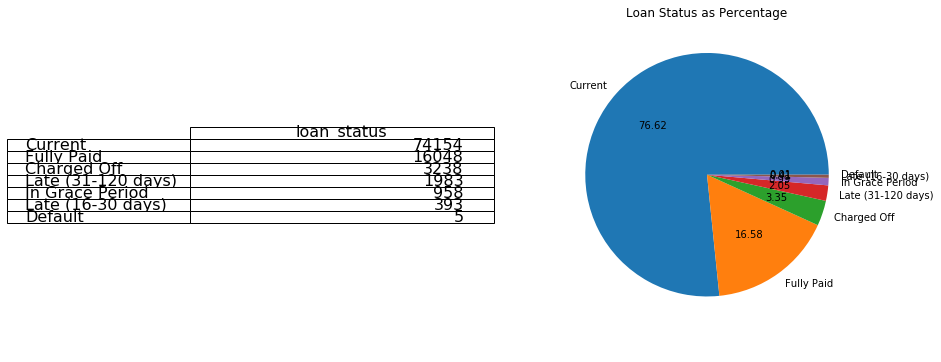

In [22]:
ls_vc = df.loan_status.value_counts()
print("Missing loan status:", df.loan_status.isnull().any())
plt.figure(figsize=(12,6)); 
ax1 = plt.subplot(122, aspect='equal'); ls_vc.plot.pie(ax=ax1, autopct='%.2f'); plt.ylabel(''); plt.title('Loan Status as Percentage');
ax2 = plt.subplot(121); plt.axis('off'); tbl = table(ax2, ls_vc, loc='center'); tbl.set_fontsize(16);

In [23]:
# convert loan_status column text to 1 and 0:
loan_status_c = lambda x: 1 if ((x == 'Charged Off') | (x == 'Default')) else 0
df.loan_status = df.loan_status.map(loan_status_c)

### loan_amount & installment
Plot of the Distribution of Loan Amount and Installment. They are numerical values, we can leave them as is.
This plot shows how much each month the borrower needs to replay. The mean is between 200 and 300.

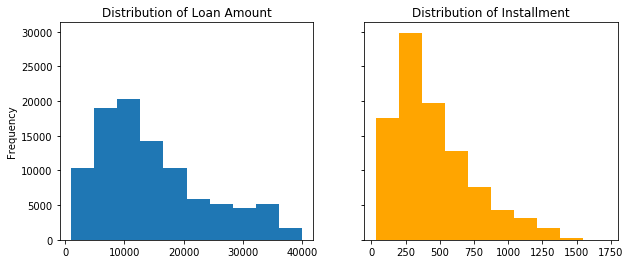

In [24]:
fig, ax = plt.subplots(figsize=(10,4))
plt.subplot(121, sharey=ax); df.loan_amnt.plot.hist(title='Distribution of Loan Amount');
plt.subplot(122, sharey=ax); df.installment.plot.hist(title='Distribution of Installment', color='orange');

### term
There are only 36 and 60 month loan terms. It is reasonable to leave term as a number, but strip the alpha part and keep only the number representing the length of the loan term.

,term
60 months,24369
36 months,72410


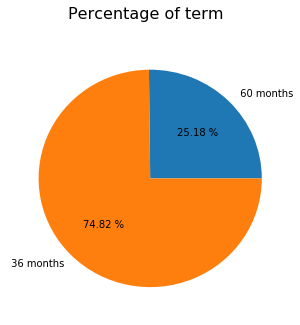

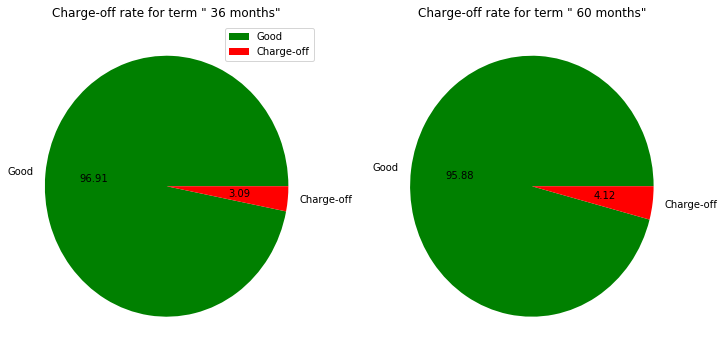

In [25]:
analyze_col(df, 'term')

In [26]:
# term converter:
term_c = lambda x: np.int32(x.lstrip()[:2]) # keep the numerical part of term and convert to int
df.term = df.term.map(term_c)

### int_rate
Interest rate is a percentage value. We need to keep the float value of the string. The statistics for the interest rate are in the tables below. Overall the charge-off loans have higher mean interest rate of 17.45%, while the good loans have 13.23%. 

In [27]:
#converter
int_rate_c = lambda x: np.float32(x.strip('%')) # strip the percent sign from interest rate
df.int_rate = df.int_rate.map(int_rate_c)
print('Good loan Interest Rate statistics:')
display(pd.DataFrame(df[df.loan_status == 0].int_rate.describe()).T.round(2))
print('Charge-off loan Interest Rate statistics:')
display(pd.DataFrame(df[df.loan_status == 1].int_rate.describe()).T.round(2))

Good loan Interest Rate statistics:


,count,mean,std,min,25%,50%,75%,max
int_rate,93536.0,13.23,4.97,5.32,10.49,12.74,15.99,30.99


Charge-off loan Interest Rate statistics:


,count,mean,std,min,25%,50%,75%,max
int_rate,3243.0,17.45,6.07,5.32,12.74,15.99,19.99,30.99


The mean interest rate of charged-off loans are higher than good loans. This is evident from the box plot below:

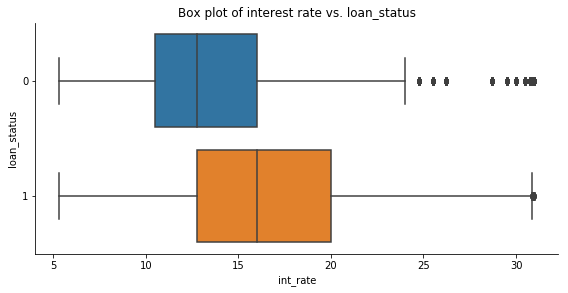

In [28]:
sns.factorplot(kind='box', orient='horizontal', x='int_rate', y='loan_status', aspect=2,
               data=df[['loan_status', 'int_rate']]); plt.title('Box plot of interest rate vs. loan_status');

The distributions of the interest rates are a little right squewd. This may need to be normalized. 

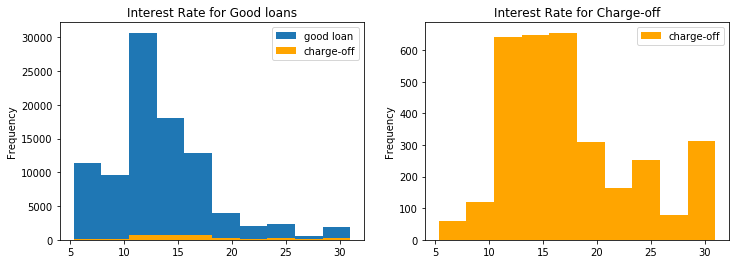

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.subplot(121, sharey=ax); 
df[df.loan_status == 0].int_rate.plot.hist(); plt.title('Interest Rate for Good loans');
df[df.loan_status == 1].int_rate.plot.hist(color='orange'); 
plt.legend(labels=['good loan', 'charge-off']);
plt.subplot(122); 
df[df.loan_status == 1].int_rate.plot.hist(color='orange'); plt.title('Interest Rate for Charge-off');
plt.legend(labels=['charge-off']);

### grade & sub_grade
Loans are divided into sub-categores based on borrower rating. A is best and G is worst. I encode each grade as a number from 1 to 7.


,grade
G,508
F,1735
E,5056
D,12029
A,14976
B,28776
C,33699


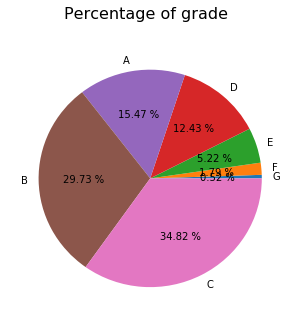

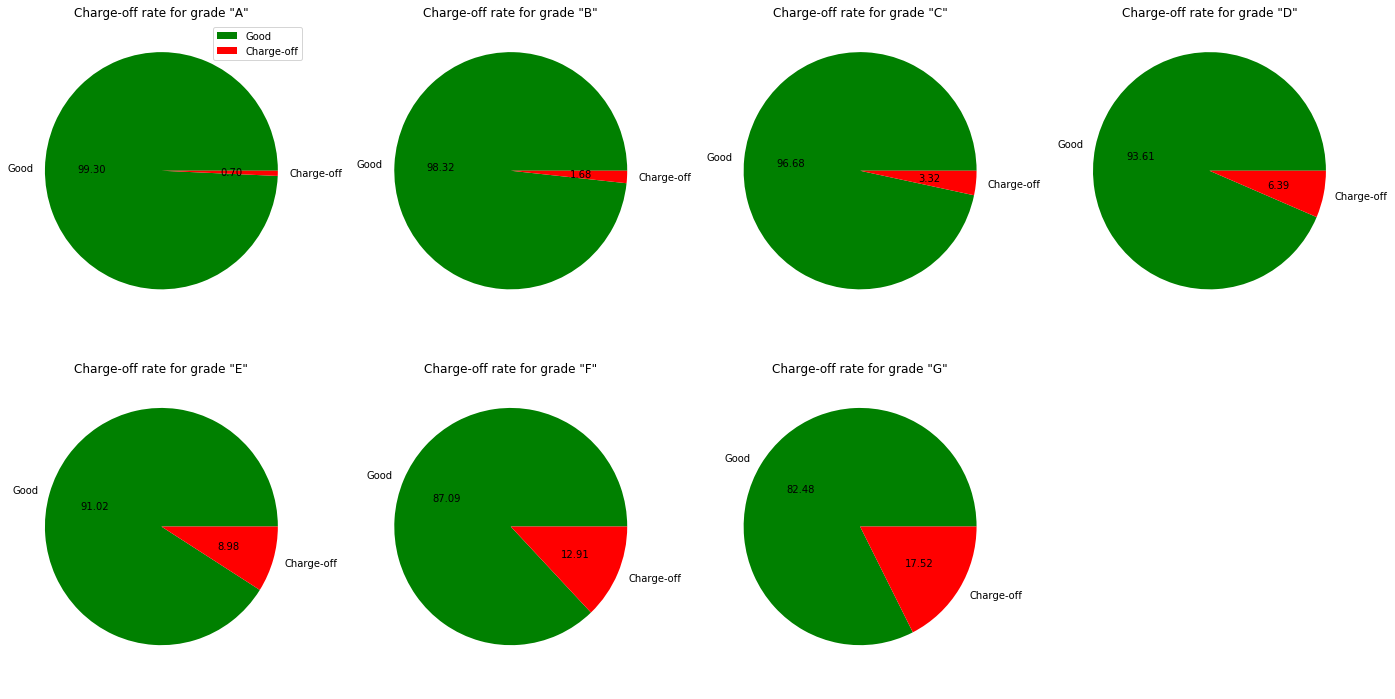

In [30]:
analyze_col(df, 'grade')

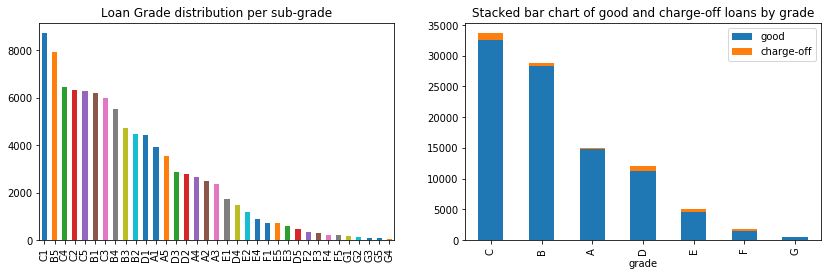

In [31]:
gls = df.groupby(['grade','loan_status']).size().unstack('loan_status').sort_values(by=0, ascending=False)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
df.sub_grade.value_counts().plot.bar(title='Loan Grade distribution per sub-grade', ax=ax1);
#df.grade.value_counts().plot.bar(title='Loan Grade distribution', ax=ax2);
gls.plot.bar(title='Stacked bar chart of good and charge-off loans by grade', stacked=True, ax=ax2); 
plt.legend(labels=['good', 'charge-off']); 

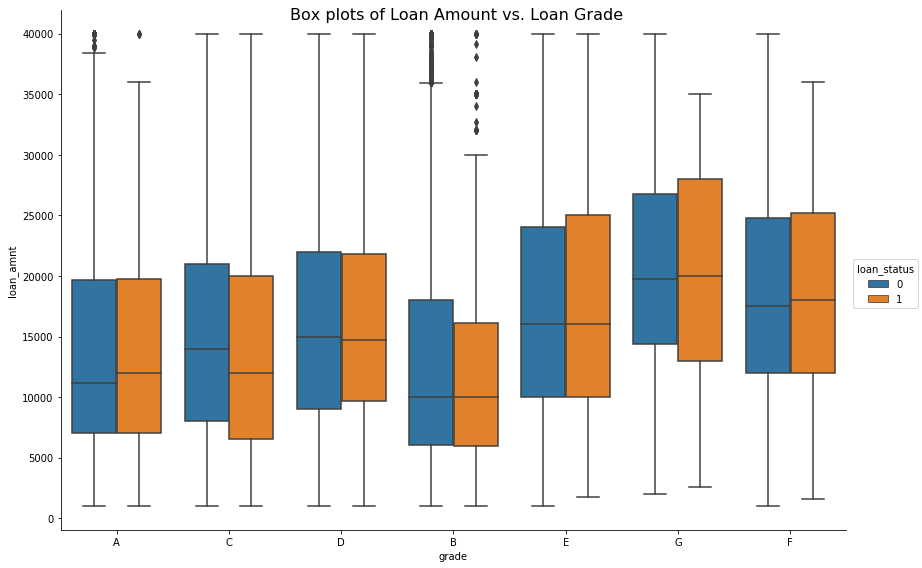

In [32]:
sns.factorplot(data=df, kind='box', y='loan_amnt', x='grade', hue='loan_status', hue_order=[0,1],
                size=8,  aspect=1.5); plt.suptitle('Box plots of Loan Amount vs. Loan Grade', fontsize=16);

The figure below shows how loan amounts vary across loan grade. Loan grade 7 corresponds to 'A' and is the best grade. We can see that the trend is that lower grade borrowers tend to borrows a higher amount. Charge-off status (orange) and good status are hard to tell apart by loan amount and grade.

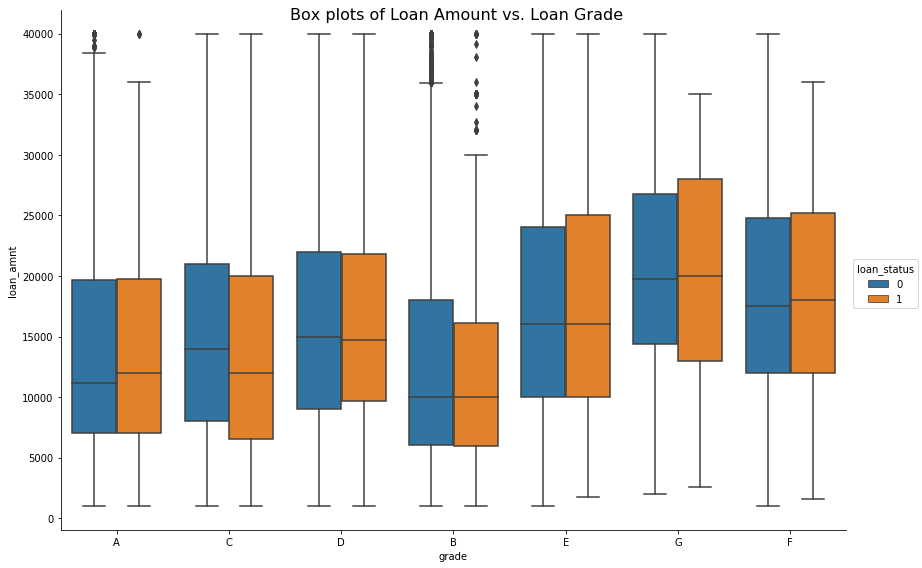

In [33]:
sns.factorplot(data=df, kind='box', y='loan_amnt', x='grade', hue='loan_status', hue_order=[0,1],
                size=8,  aspect=1.5); plt.suptitle('Box plots of Loan Amount vs. Loan Grade', fontsize=16);

We can see from the pie charts below that good loans have a much higher percentage of grade 'A' and 'B' loans than charge-off loans. Grade 'C' are represeted equally in both loan status. Since most loans are grade 'C' we can gain most by accurately predicting charge-off in grade 'C' loans.

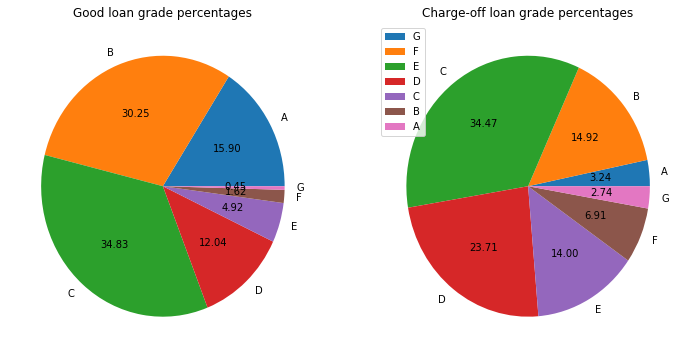

In [34]:
gls = df.groupby(['grade','loan_status']).size()
plt.subplots(12, figsize=(12, 6))
plt.subplot(121); 
gls.xs(0, level=1).plot.pie( autopct='%.2f');
plt.ylabel(''); plt.title('Good loan grade percentages');

plt.subplot(122); 
gls.xs(1, level=1).plot.pie( autopct='%.2f');
plt.legend(labels=['G','F', 'E', 'D', 'C', 'B', 'A'], loc=2);plt.ylabel('');plt.title('Charge-off loan grade percentages');


In [35]:
# converter:
grade_d = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F':2, 'G': 1}
grade_c = lambda x: grade_d.get(x)
df.grade = df.grade.map(grade_c)
df.drop(columns='sub_grade', inplace=True)

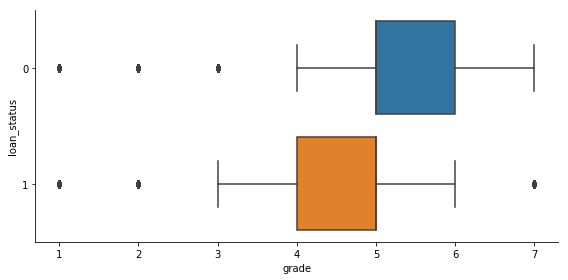

In [36]:
sns.factorplot(kind='box', orient='horizontal', 
               x='grade', y='loan_status', aspect=2,
               data=df[['loan_status', 'grade']]); 

### emp_length
About one third of the loans were given to individuals with 10+ years of employment. The other 2/3 are given in a much lower proportion to shorter term. 10+ is a collective buckes as includes employment lenghts of 11, 12, 15, 20 up to retirement. I encode employment length with the number of years, where the label is the year. 10+ years is encoded as 12, < 1 year is 0.5, and where not available it is 0.

In [37]:
df.emp_length.isnull().any()

True

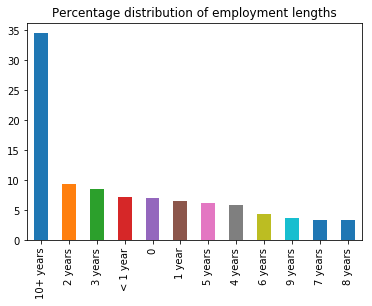

In [38]:
# Encode emp_length: number to number and NaN to 0
df.emp_length.fillna('0', inplace=True)

eld = round(df.emp_length.value_counts()/len(df)*100,1)
eld.plot.bar(title='Percentage distribution of employment lengths');

,emp_length
8 years,3199
7 years,3222
9 years,3580
6 years,4248
4 years,5727
5 years,6042
1 year,6421
0,6792
< 1 year,6951
3 years,8180


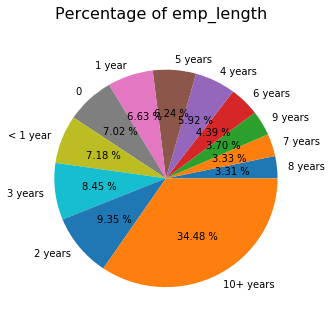

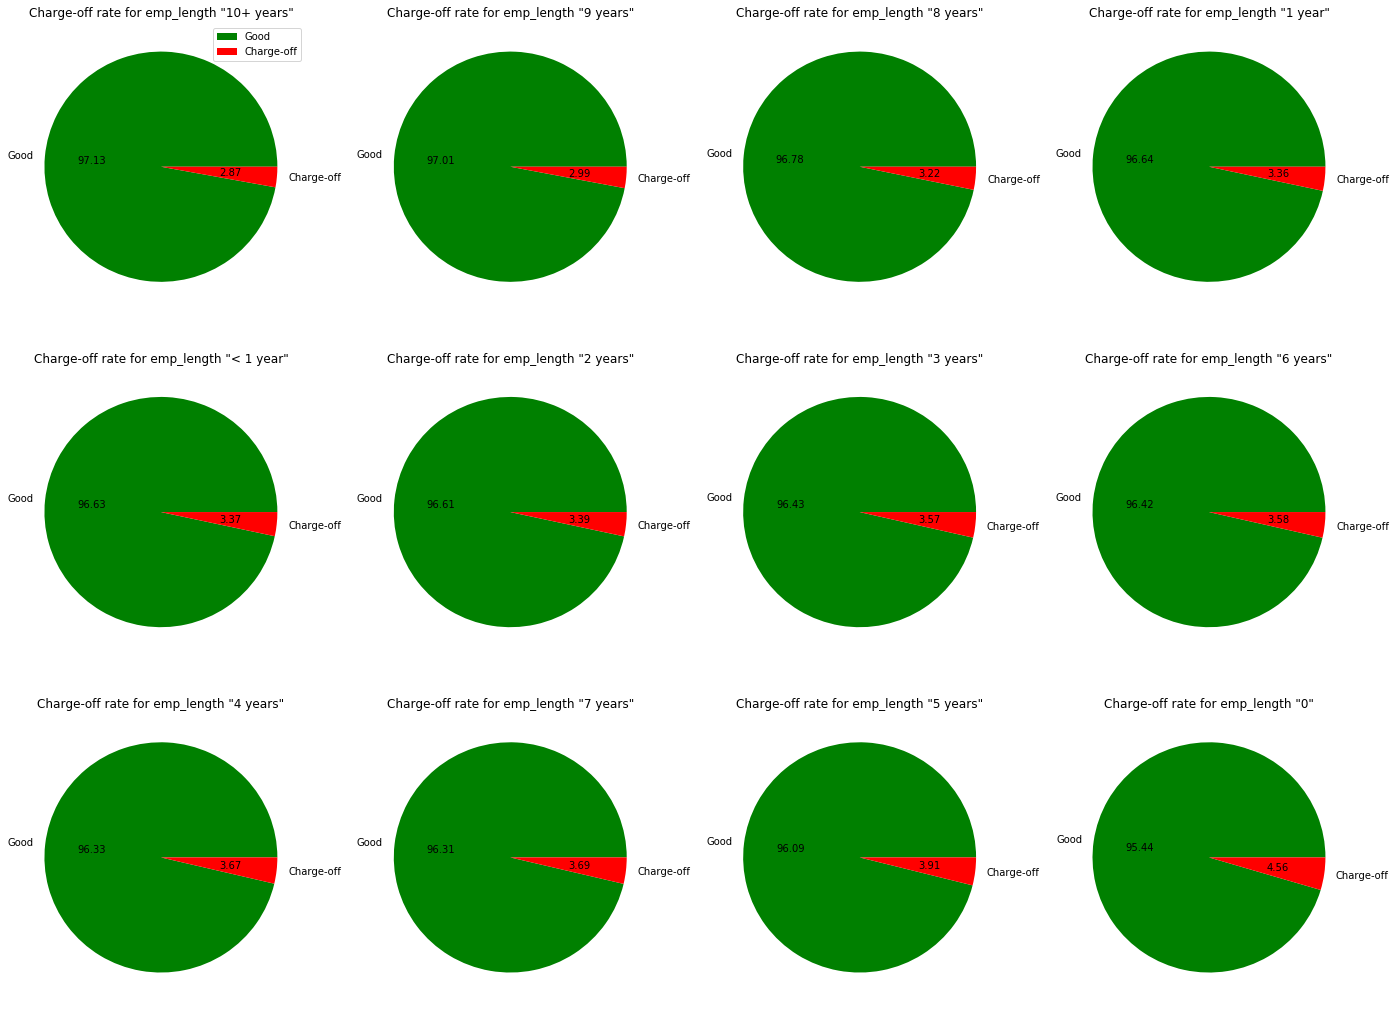

In [39]:
analyze_col(df,'emp_length')

In [40]:
# converter:
#import re
#[ re.search(r'\d+', s).group() for s in df.emp_length.unique()]
emp_len_m = {'10+ years':12, '3 years': 3, '6 years': 6, '0':0, np.nan: 0, '< 1 year': 0.5, '1 year': 1,
       '4 years':4, '8 years':8, '2 years':2, '5 years':5, '9 years':9, '7 years':7}
df.emp_length = df.emp_length.map(emp_len_m)

### home_ownership
About half of the loan recipients pay mortgage, compared to renting, owning or other. It begs to ask how much money borrowers have left over after paying their mortgages? It seems reasonable to think that people with a long a reliable mortgage history may have higher rating. It will be worth investigating correlation between Home Ownership and other features. Also does NONE mean that a borrower is homeless? Other features such as car ownership would be useful to know: a person may default on other loans before a car loan.
    

In [41]:
# encode
print("Missing home ownership:", df.home_ownership.isnull().any())
df.home_ownership.fillna('NONE', inplace=True)

Missing home ownership: False


,home_ownership
NONE,1
ANY,381
OWN,11135
RENT,37179
MORTGAGE,48083


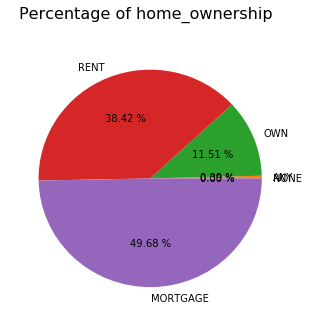

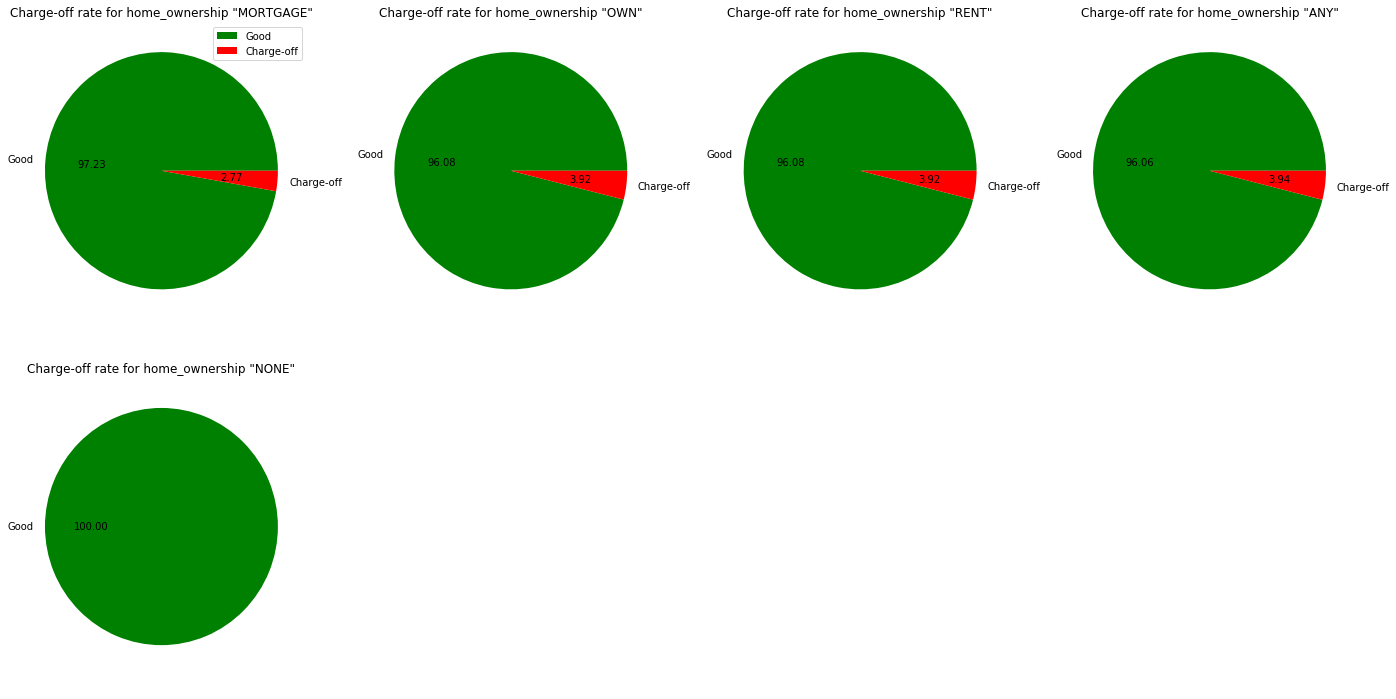

In [42]:
analyze_col(df, 'home_ownership')

In [43]:
# convert to dummies and drop column
df = dummies(df, 'home_ownership', 'home_own')

### annual_inc
The annual income is perhaps one of the pivotal features. It is worth taking a deeper look. The histogram below shows income distribution in the \$0-200k range. There appears to be spurious data, for illustration see the table. There is a  borrower with income \$61 million and emp_title indicated waitress. There is some data that is suspicious and unlikely. It may be worth asking LC a few questions about their verification process! 
Also, it appears as if there were three nested distributions, I am not sure if it is real.

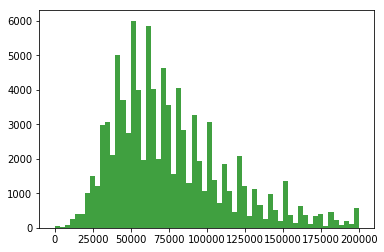

In [44]:
plt.hist((df.annual_inc), 60, range=(0, 200000), facecolor='g', alpha=0.75);

The box plots below illustrate the annual income ranges. The outlies are identified by the IQR as incomes above about $200k. 

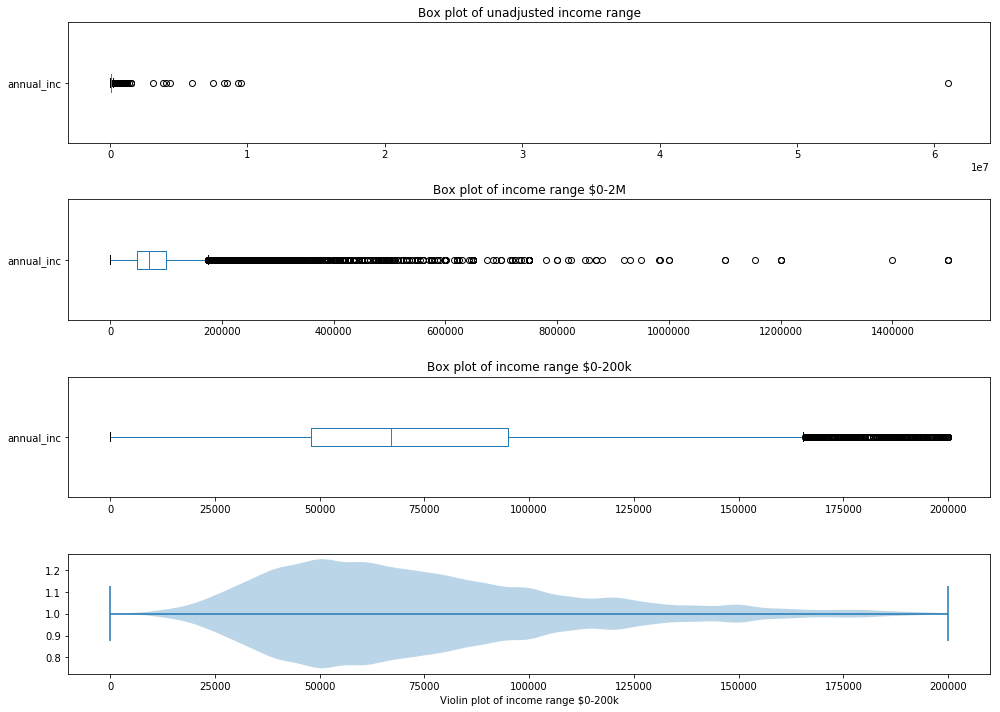

In [45]:
fig, axes = plt.subplots(4,1,figsize=(14,10))
plt.subplot(411)
plt.title='Income distribution'
df.annual_inc.plot.box(vert=False, title='Box plot of unadjusted income range');


plt.subplot(412)
df[df.annual_inc < 2e6].annual_inc.plot.box(vert=False, title='Box plot of income range $0-2M');

plt.subplot(413)
df[df.annual_inc < 2e5].annual_inc.plot.box(vert=False, title='Box plot of income range $0-200k');

plt.subplot(414)
plt.violinplot(df[df.annual_inc < 2e5].annual_inc, vert=False);
plt.xlabel('Violin plot of income range $0-200k');
plt.tight_layout()


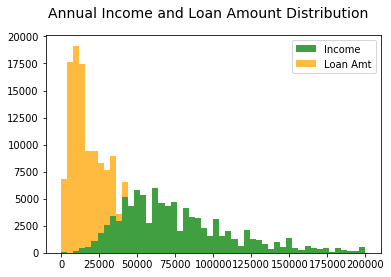

In [46]:
a,b,c = plt.hist((df.annual_inc, df.loan_amnt), 50, color=['g','orange'], 
                histtype='barstacked', stacked=True, range=(0, 200000), alpha=0.75)
plt.suptitle('Annual Income and Loan Amount Distribution', fontsize=14);
plt.legend(['Income', 'Loan Amt']);

The table below shows emp_title and annual income for borrowers with annual income > \$200k who defaulted. High income is not a guarantee for loan repayment.

In [47]:
df[(df.loan_status == 1) & (df.annual_inc > 2e5)][['annual_inc', 'grade', 'emp_title', 'verification_status']].sort_values('annual_inc')

,annual_inc,grade,emp_title,verification_status
60789,205000.0,5,Licensed loan officer,Verified
4287,208000.0,5,Senior Consultant,Source Verified
62558,208000.0,3,Physician,Verified
72931,210000.0,4,General Manager,Source Verified
89676,210000.0,5,Assistant General Counsel,Source Verified
72198,210000.0,5,owner,Source Verified
15246,210000.0,7,President,Verified
15559,210000.0,2,Sales,Verified
42415,211200.0,5,Senior Accountant,Source Verified
46155,211400.0,4,Director,Source Verified


In [48]:
print("Number of borrowers with income equal to zero:", len(df[df.annual_inc == 0]))
print("Number of borrowers making more than a million:", len(df[df.annual_inc > 1e6]))


Number of borrowers with income equal to zero: 31
Number of borrowers making more than a million: 21


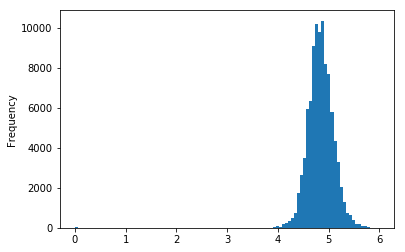

In [49]:
# Transform annual income:
# some joint borrowers' annual income is zero. In order to log normalize it we need to change zero to a very small number, like 1.
ind = df[df.annual_inc == 0].index 
df.loc[ind, 'annual_inc'] = 1

#I will drop rows with annual_inc > 1 million
df = df[df.annual_inc < 1000000]

np.log10(df.annual_inc).plot.hist(bins=100);
#df.annual_income = np.log10(df.annual_inc)

### application_type
Some borrower borrow jointly with other individuals. The joint status type of the loan is indicated by this field.

,application_type
Joint App,4406
Individual,92350


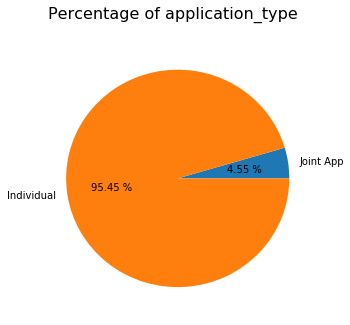

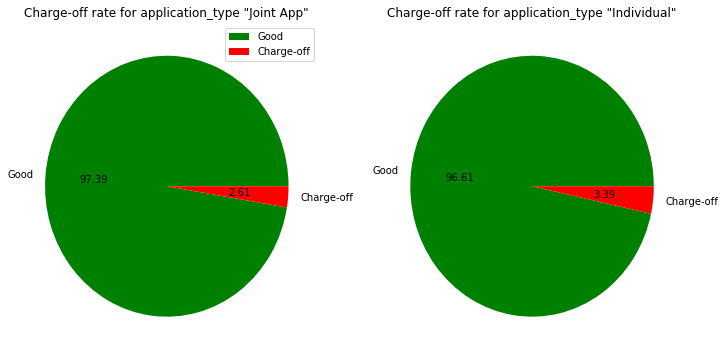

In [50]:
analyze_col(df, 'application_type')

In [51]:
# encode application_type
df.application_type = df.application_type.map({'Individual': 1, 'Joint App': 0})

### annual_inc_joint
Some borrower borrow jointly. If the borrower is an individual, the annual_inc_joint field is NaN, so we fill it with 1 so that we can log normalize it.

In [52]:
# copy values from annual_inc over to annual_inc_joint
df.annual_inc_joint.fillna(df.annual_inc, inplace=True)

In [53]:
print("Mislabeled application type conunt:", len(df[(df.annual_inc_joint == 1) & (df.application_type == 0)]))

Mislabeled application type conunt: 0


In [54]:
idx = df[df.application_type == 0].index
print('Joint App');
display(df.loc[idx, ['annual_inc', 'annual_inc_joint', 'application_type']].head(5));

Joint App


,annual_inc,annual_inc_joint,application_type
113,100000.0,135000.0,0
118,90000.0,100000.0,0
139,31872.0,123471.0,0
146,35000.0,79500.0,0
164,102000.0,152000.0,0


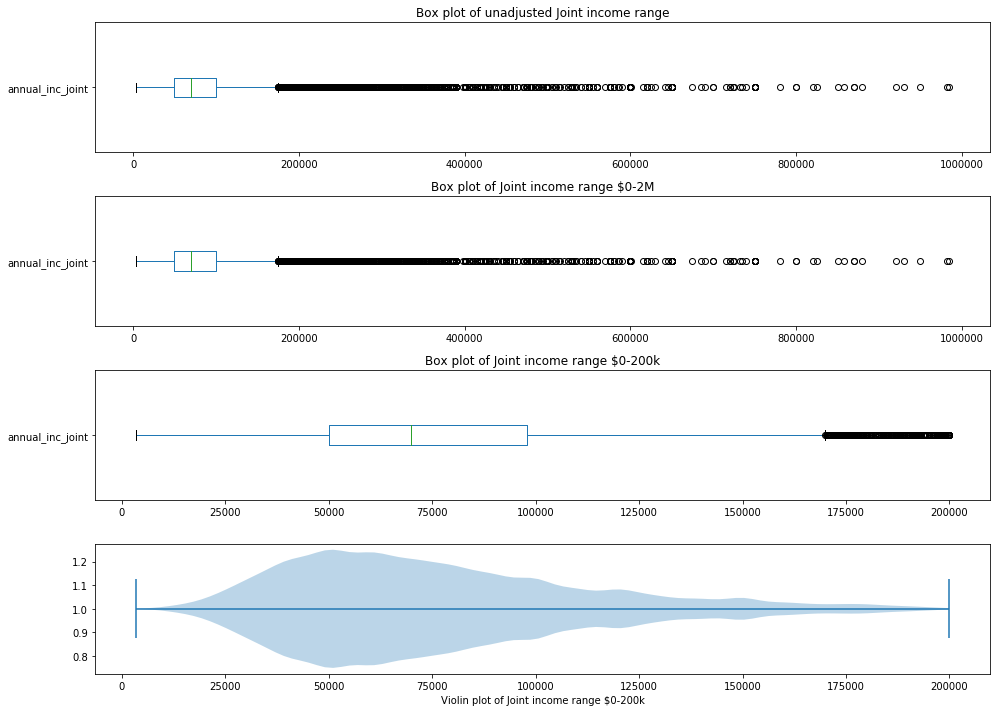

In [55]:
fig, axes = plt.subplots(4,1,figsize=(14,10))
plt.subplot(411)
plt.title='Income distribution'
df.annual_inc_joint.plot.box(vert=False, title='Box plot of unadjusted Joint income range');

plt.subplot(412)
df[df.annual_inc_joint < 2e6].annual_inc_joint.plot.box(vert=False, title='Box plot of Joint income range $0-2M');

plt.subplot(413)
df[df.annual_inc_joint < 2e5].annual_inc_joint.plot.box(vert=False, title='Box plot of Joint income range $0-200k');

plt.subplot(414)
plt.violinplot(df[df.annual_inc_joint < 2e5].annual_inc_joint, vert=False);
plt.xlabel('Violin plot of Joint income range $0-200k');
plt.tight_layout()

It looks like the best option id to use the joint income. There the zero income problem goes away and the distibution looks nice and centered.

In [56]:
# convert
df.annual_inc_joint = np.log10(df.annual_inc_joint)
df.drop(columns='annual_inc', inplace=True)

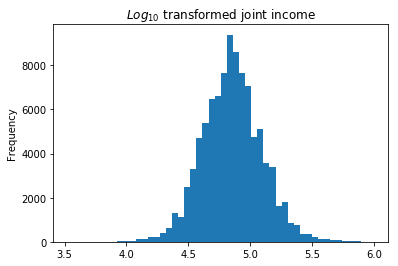

In [57]:
df.annual_inc_joint.plot.hist(bins=50, title=r'$Log_{10}$ transformed joint income'); 

### emp_title
The output below shows that about 7% of loans have no employment title. This may be indicative. It may be worth encoding it a title/no title. There is a very large number of different titles, one out of three loans have a unique employment title. Missing employee title has a little higher charge-off rate.

In [58]:
print("Percent of missing job title:", round(len(df[df.emp_title.isnull()])/len(df)*100, 2) )
print("Percentage of unique titles:", round(len(df.emp_title.unique()) / len(df) * 100, 2))

Percent of missing job title: 7.12
Percentage of unique titles: 36.69


In [59]:
# encode 
df.emp_title = df.emp_title.isnull().map({True:1, False: 0})

,emp_title
1,6892
0,89864


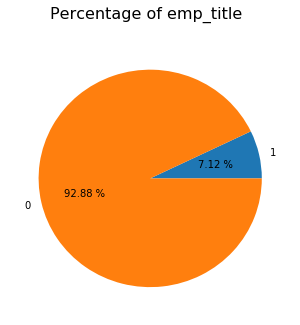

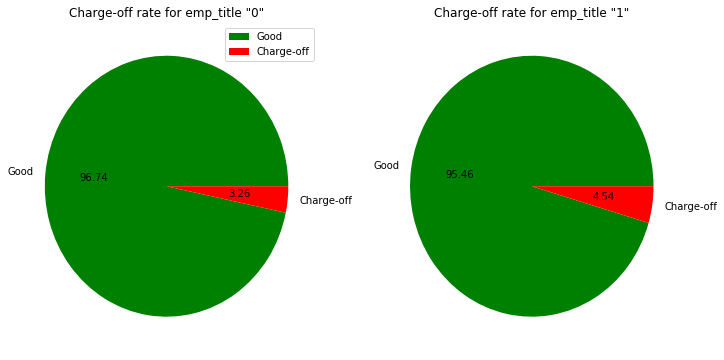

In [60]:
analyze_col(df, 'emp_title')

### verification_status
Indicates if income was verified by LC, not verified, or if the income source was verified. It can take on values 'Source Verified', 'Not Verified', 'Verified'. Below pie plot shows surpisingly that Verified status is charged off at a higher rate than 'Source Verified', 'Not Verified'. The values need to be one-hot encoded.

,verification_status
Verified,27540
Not Verified,31014
Source Verified,38202


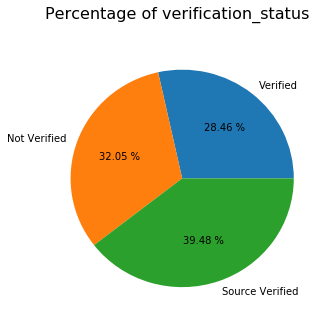

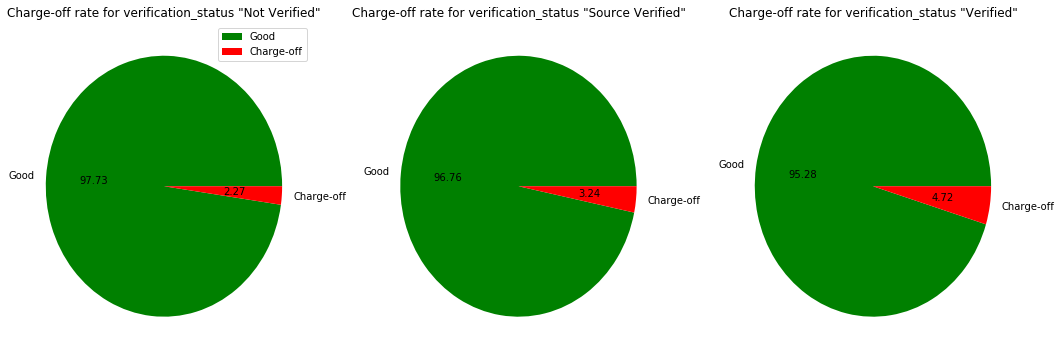

In [61]:
analyze_col(df, 'verification_status')

In [62]:
# convert to dummies and drop column
df = dummies(df, 'verification_status', 'ver_stat')

### pymnt_plan
Indicates if a payment plan has been put in place for the loan. Since most loans have no payment plan, this column is not very informative. I'll drop it.

,pymnt_plan
y,63
n,96693


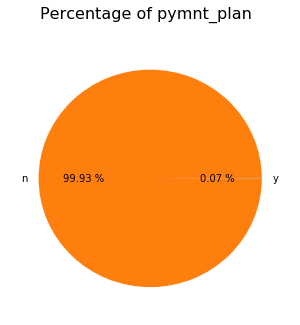

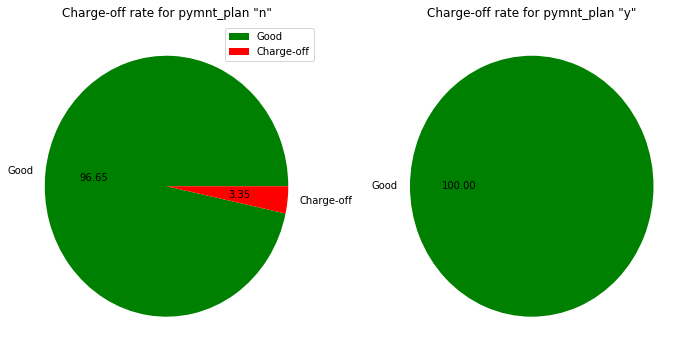

In [63]:
analyze_col(df, 'pymnt_plan')

In [64]:
df.drop(columns='pymnt_plan', inplace=True)

### purpose

Missing purpose value: False


,purpose
renewable_energy,68
house,429
moving,704
vacation,780
car,1118
small_business,1145
medical,1353
major_purchase,2171
other,6131
home_improvement,7055


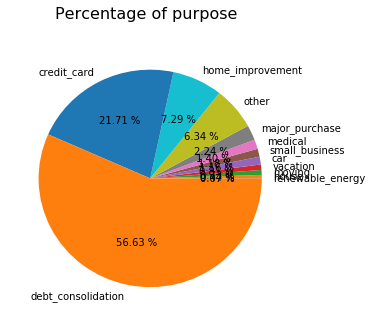

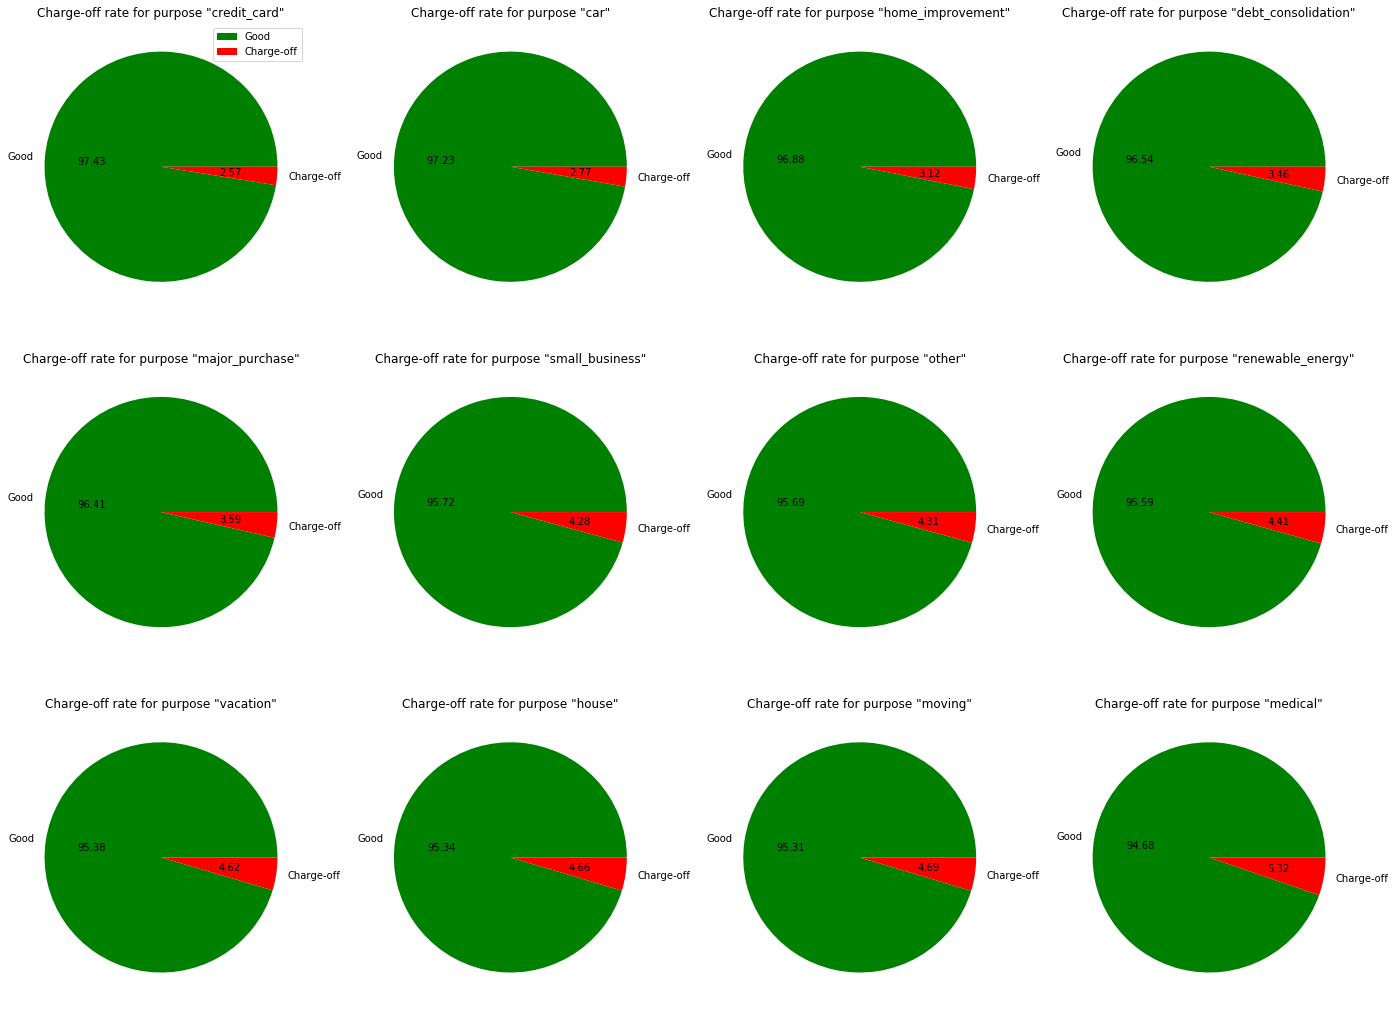

In [65]:
print("Missing purpose value:", df.purpose.isnull().any())
analyze_col(df, 'purpose')

### zip_code
The zip codes will be reduced to the first two digits of the zip code. They may have to be dropped if it does not work out.

In [66]:
# most common zip code
mcz = df.zip_code.value_counts().sort_values(ascending=False).index.values[0]
df.zip_code.fillna(mcz, inplace=True)
# encode:
df.zip_code = [int(s[:2]) for s in df.zip_code]

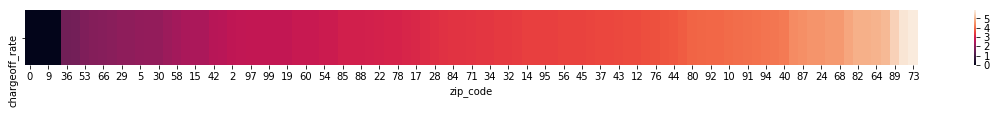

In [84]:
cr = chargeoff_rank(df, 'zip_code')
plt.figure(figsize=(20,1)); sns.heatmap(cr.T);

### dti

### delinq_2yrs

### earliest_cr_line

### fico_range_low & fico_range_high

### inq_last_6mths

### mths_since_last_delinq

### mths_since_last_record

### open_acc

### pub_rec

In [ ]:

# converters
term_c = lambda x: np.int32(x.lstrip()[:2]) # keep the numerical part of term and convert to int
int_rate_c = lambda x: np.float32(x.strip('%')) # strip the percent sign from interest rate
grade_d = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F':2, 'G': 1}
grade_c = lambda x: grade_d.get(x)
loan_status_c = lambda x: 1 if ((x == 'Charged Off') | (x == 'Default')) else 0
emp_title_c = lambda x: 1 if x is None else 0
annual_inc_c = lambda x: np.log10(1 if x == 0 else x)
annual_inc_joint_c = lambda x: np.log10(1 if x == 0 else x)
application_type_d = {'Individual': 1, 'Joint App': 0}
application_type_c = lambda x: application_type_d.get(x)


conv = {'term': term_c, 'int_rate':int_rate_c, 'grade': grade_c, 'loan_status': loan_status_c, 
        'emp_title': emp_title_c, 'annual_inc': annual_inc_c, 'annual_inc_joint_c': annual_inc_joint_c,
       'application_type': application_type_c}
